In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
transform = transforms.ToTensor()

In [107]:
train_data = datasets.MNIST(root='../Data/', train=True, download=True, transform=transform)

In [108]:
test_data = datasets.MNIST(root='../Data/', train=False, download=True, transform=transform)

In [8]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [31]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [32]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
train_data[0][1]

5

In [42]:
image, label = train_data[0]

In [43]:
image.shape

torch.Size([1, 28, 28])

In [44]:
label

5

In [29]:
type(train_data[0])

tuple

In [33]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [30]:
type(train_data[0][0])

torch.Tensor

In [34]:
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [35]:
type(train_data[0][0][0])

torch.Tensor

In [36]:
train_data[0][0][0][6]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1176,
        0.1412, 0.3686, 0.6039, 0.6667, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922,
        0.8824, 0.6745, 0.9922, 0.9490, 0.7647, 0.2510, 0.0000, 0.0000, 0.0000,
        0.0000])

In [37]:
type(train_data[0][0][0][6])

torch.Tensor

In [38]:
train_data[0][0][0][6][10]

tensor(0.3686)

In [39]:
type(train_data[0][0][0][6][10])

torch.Tensor

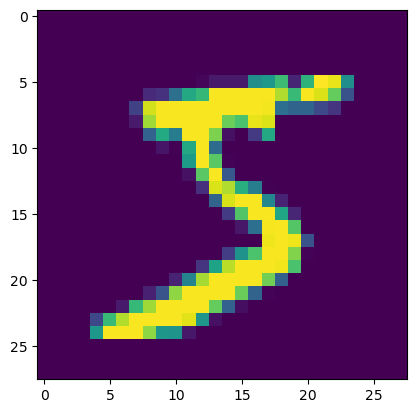

In [45]:
plt.imshow(image.reshape((28,28)))

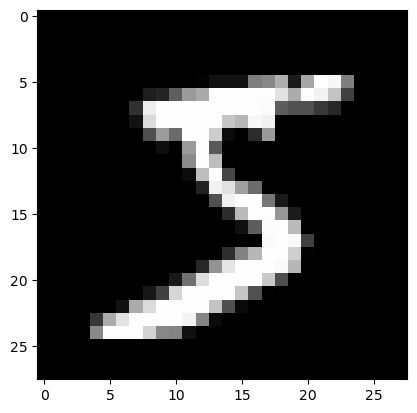

In [46]:
plt.imshow(image.reshape((28,28)), cmap='gray')

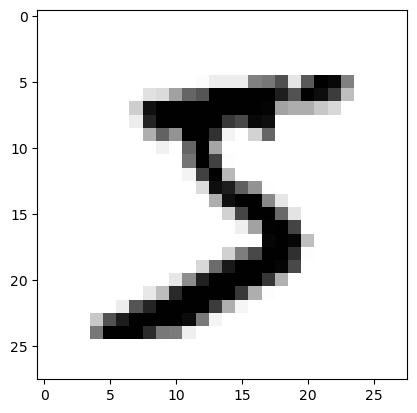

In [48]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

In [109]:
# how to load batches with DataLoader

torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)  # no need to update the parameters in test, so shuffle is set to False

In [95]:
from torchvision.utils import make_grid

In [51]:
# Grab the first batch

for images, labels in train_loader:
    break

In [53]:
images.shape  # right now only the first batch of images were left here

torch.Size([200, 1, 28, 28])

In [54]:
labels.shape

torch.Size([200])

In [59]:
labels[:12]

tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3])

In [60]:
labels[:12].numpy()

array([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3], dtype=int64)

In [61]:
print('Labels: ', labels[:12].numpy())

Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


In [63]:
images[:12].shape

torch.Size([12, 1, 28, 28])

In [55]:
# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8, the default padding is 2

After arranging the 12 images in a grid with 1 row, the shape of the grid becomes:

3: PyTorch converts the single-channel grayscale images into a 3-channel format (for compatibility with plotting functions like imshow).

32: This is the height of the grid, slightly larger than 28 pixels because of padding between images (default padding in make_grid).

362: This is the width of the grid, calculated as the width of 12 images (28 pixels each) plus the padding between them.

In [57]:
im.shape

torch.Size([3, 32, 362])

In [65]:
im.numpy()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [66]:
np.transpose(im.numpy(), (1, 2, 0))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

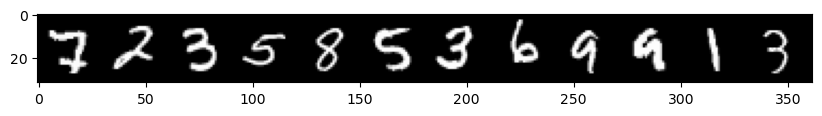

In [64]:
plt.figure(figsize=(10,4))
# Since imshow will recognize width, height, channel order, We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [110]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):

        super().__init__()

        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):

        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)   # Multi class classifiction

In [111]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [78]:
total_param = 0
for param in model.parameters():
    print(param.numel())
    total_param += param.numel()
print(f'\nTotal parameters is {total_param}')

94080
120
10080
84
840
10

Total parameters is 105214


In [112]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [81]:
images.shape  # --> [200, 784]

torch.Size([200, 1, 28, 28])

In [86]:
images.view(200, -1).shape

torch.Size([200, 784])

In [85]:
images.shape

torch.Size([200, 1, 28, 28])

## Train the model

In [113]:
import time
start_time = time.time()

# Training

epochs = 10

# Trackers for visulization
train_losses = []   # for tracking
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):

        b += 1 # Just make it start from 1 instead of 0

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        train_corr += (predicted == y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            acc = train_corr.item() * 100 / (100 * b)
            print(f'Epoch {i} Batch: {b} Loss: {loss.item()}  Accuracy: {acc}')

    train_losses.append(loss)
    train_correct.append(train_corr)

    with torch.no_grad():

        for b, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test.view(500, -1))

            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 Batch: 200 Loss: 0.23562385141849518  Accuracy: 83.245
Epoch 0 Batch: 400 Loss: 0.3533070683479309  Accuracy: 87.5325
Epoch 0 Batch: 600 Loss: 0.13734401762485504  Accuracy: 89.58166666666666
Epoch 1 Batch: 200 Loss: 0.24684999883174896  Accuracy: 94.87
Epoch 1 Batch: 400 Loss: 0.14273890852928162  Accuracy: 95.085
Epoch 1 Batch: 600 Loss: 0.0733654722571373  Accuracy: 95.355
Epoch 2 Batch: 200 Loss: 0.08371471613645554  Accuracy: 96.515
Epoch 2 Batch: 400 Loss: 0.06312298774719238  Accuracy: 96.6075
Epoch 2 Batch: 600 Loss: 0.06180889904499054  Accuracy: 96.695
Epoch 3 Batch: 200 Loss: 0.11615169793367386  Accuracy: 97.625
Epoch 3 Batch: 400 Loss: 0.05801045894622803  Accuracy: 97.4675
Epoch 3 Batch: 600 Loss: 0.03130992129445076  Accuracy: 97.49
Epoch 4 Batch: 200 Loss: 0.10859694331884384  Accuracy: 98.14
Epoch 4 Batch: 400 Loss: 0.04483110085129738  Accuracy: 97.9725
Epoch 4 Batch: 600 Loss: 0.055878061801195145  Accuracy: 97.985
Epoch 5 Batch: 200 Loss: 0.00804368499666452

In [ ]:
train_losses = [loss.item() for loss in train_losses]

In [121]:
test_losses = [loss.item() for loss in test_losses]

In [118]:
train_losses

[0.13734401762485504,
 0.0733654722571373,
 0.06180889904499054,
 0.03130992129445076,
 0.055878061801195145,
 0.06059616059064865,
 0.08384106308221817,
 0.054535940289497375,
 0.07878410071134567,
 0.0214091707020998]

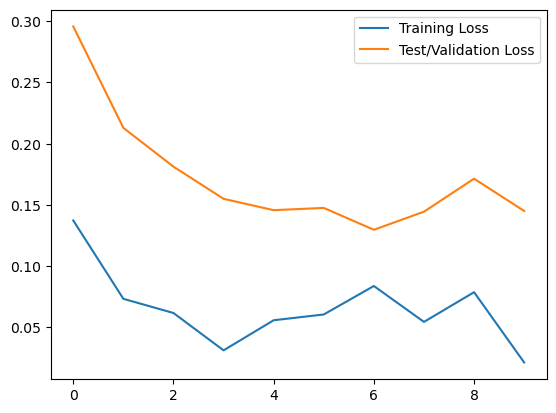

In [122]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.legend()

In [125]:
train_acc = [t/600 for t in train_correct]

In [126]:
train_acc

[tensor(89.5817),
 tensor(95.3550),
 tensor(96.6950),
 tensor(97.4900),
 tensor(97.9850),
 tensor(98.4000),
 tensor(98.6750),
 tensor(98.9150),
 tensor(99.1233),
 tensor(99.2750)]

In [127]:
test_acc = [t/100 for t in test_correct]

In [128]:
test_acc

[tensor(94.3600),
 tensor(95.8000),
 tensor(96.9000),
 tensor(97.2100),
 tensor(97.5800),
 tensor(97.6100),
 tensor(97.7700),
 tensor(97.6000),
 tensor(97.6400),
 tensor(97.7400)]

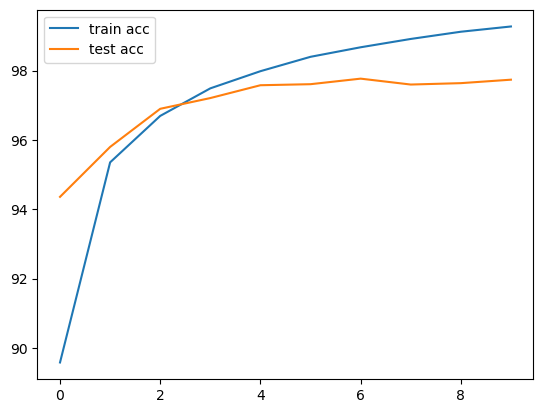

In [129]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [130]:
# New unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [132]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [135]:
100*correct.item()/len(X_test)

97.74